# **Import Necessary Libraries**

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# **Load the Dataset**

In [51]:
data = pd.read_csv("/content/stock_prices.csv")
data.head()

,Date,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZION,ZNGA
0,2003-07-31,13.790836,53.019848,1.019303,NaN,12.739487,9.022574,15.108545,16.333433,26.962475,...,7.946304,53.450195,19.403030,24.283438,20.140688,23.011992,NaN,8.275629,46.391441,NaN
1,2003-08-01,13.676599,51.759747,1.002379,NaN,12.579965,8.859362,15.816516,16.268559,28.070812,...,7.858501,50.491951,19.898077,24.112812,19.770533,22.692390,NaN,8.272863,46.557457,NaN
2,2003-08-04,13.682946,52.256149,1.025589,NaN,12.398233,8.850165,15.660917,16.523066,28.227112,...,7.803621,51.500431,19.838972,24.303909,19.728891,21.605703,NaN,8.239684,46.673660,NaN
3,2003-08-05,13.219654,51.206055,0.985455,NaN,12.111500,8.700747,15.147444,16.183720,27.132978,...,7.699356,51.856777,19.225708,24.126451,19.405010,21.605703,NaN,8.167795,46.325050,NaN
4,2003-08-06,13.060995,50.783653,0.949190,NaN,11.752071,8.873152,14.937387,15.749559,27.175615,...,7.748745,52.643398,19.151808,24.399456,19.423517,21.818781,NaN,8.037839,46.648762,NaN


# **Check if the DataFrame is Empty**

In [52]:
if data.empty:
    print("DataFrame is empty. Please check the file path and contents.")
else:
    print(data.head())
    print(data.columns)
    print(data.shape)

         Date          A         AA      AAPL  ABBV        ABC       ABT  \
0  2003-07-31  13.790836  53.019848  1.019303   NaN  12.739487  9.022574   
1  2003-08-01  13.676599  51.759747  1.002379   NaN  12.579965  8.859362   
2  2003-08-04  13.682946  52.256149  1.025589   NaN  12.398233  8.850165   
3  2003-08-05  13.219654  51.206055  0.985455   NaN  12.111500  8.700747   
4  2003-08-06  13.060995  50.783653  0.949190   NaN  11.752071  8.873152   

         ACN       ADBE        ADI  ...       XEL         XL       XLNX  \
0  15.108545  16.333433  26.962475  ...  7.946304  53.450195  19.403030   
1  15.816516  16.268559  28.070812  ...  7.858501  50.491951  19.898077   
2  15.660917  16.523066  28.227112  ...  7.803621  51.500431  19.838972   
3  15.147444  16.183720  27.132978  ...  7.699356  51.856777  19.225708   
4  14.937387  15.749559  27.175615  ...  7.748745  52.643398  19.151808   

         XOM       XRAY        XRX  XYL       YUM       ZION  ZNGA  
0  24.283438  20.140688

# **Preprocess the Data**

In [53]:
data = data.dropna()
data = data.reset_index(drop=True)
data.head()

,Date,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZION,ZNGA
0,2013-06-19,29.691301,18.729246,47.587383,36.561169,51.778156,32.634403,73.243187,45.779999,40.860481,...,24.334883,27.910128,35.314037,77.731171,40.068405,22.446033,25.444780,46.157974,25.877367,2.89
1,2013-06-20,28.872602,18.521400,46.894390,34.879227,50.454807,31.697100,71.175598,44.900002,39.644604,...,23.618900,27.149441,34.248222,76.065514,39.405796,21.923483,24.660427,44.789577,26.386652,2.86
2,2013-06-21,29.322886,18.429020,46.518631,36.204395,50.641197,32.066616,71.068184,44.770000,40.079483,...,23.874613,26.769093,34.621258,76.432816,39.824795,22.042238,24.370964,44.524918,26.819063,2.71
3,2013-06-24,28.865784,17.990236,45.285645,35.584282,49.960896,31.516848,70.853363,43.599998,39.076603,...,23.883137,26.551748,34.292625,75.578621,39.347328,21.258417,24.062824,43.956909,26.722969,2.58
4,2013-06-25,28.981768,18.290459,45.295765,36.212902,49.904964,31.643023,71.300903,44.369999,39.511478,...,24.189985,26.950211,34.798897,76.116768,39.210911,21.305922,24.212223,44.111820,27.366783,2.75


# **Choose a Stock Symbol for Prediction**

In [54]:
stock_symbol = 'AAPL'

# **Prepare the Data**

In [55]:
stock_data = data[[stock_symbol]].values
stock_data

array([[ 47.587383],
       [ 46.89439 ],
       [ 46.518631],
       [ 45.285645],
       [ 45.295765],
       [ 44.782776],
       [ 44.30014 ],
       [ 44.609531],
       [ 46.037151],
       [ 47.080013],
       [ 47.33989 ],
       [ 46.959641],
       [ 46.693016],
       [ 47.514263],
       [ 47.332012],
       [ 48.070004],
       [ 47.982265],
       [ 48.086884],
       [ 48.397385],
       [ 48.409752],
       [ 48.57288 ],
       [ 47.806759],
       [ 47.959759],
       [ 47.136261],
       [ 49.557255],
       [ 49.331139],
       [ 49.611256],
       [ 50.376251],
       [ 50.998383],
       [ 50.909512],
       [ 51.376385],
       [ 52.035629],
       [ 52.813   ],
       [ 52.340504],
       [ 52.310131],
       [ 54.359478],
       [ 53.585957],
       [ 55.108219],
       [ 57.727081],
       [ 58.780064],
       [ 58.710487],
       [ 59.23167 ],
       [ 59.869583],
       [ 59.083099],
       [ 59.235218],
       [ 59.305954],
       [ 59.077202],
       [ 59.3

# **Scale the Data**

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)
scaled_data

array([[0.04841961],
       [0.03821214],
       [0.03267738],
       [0.01451605],
       [0.01466511],
       [0.00710901],
       [0.        ],
       [0.00455719],
       [0.02558539],
       [0.04094628],
       [0.04477415],
       [0.03917326],
       [0.03524599],
       [0.04734259],
       [0.04465811],
       [0.0555284 ],
       [0.05423605],
       [0.05577704],
       [0.06035058],
       [0.06053274],
       [0.06293554],
       [0.05165092],
       [0.05390454],
       [0.04177479],
       [0.07743494],
       [0.07410436],
       [0.07823035],
       [0.08949839],
       [0.09866211],
       [0.09735308],
       [0.10422991],
       [0.11394028],
       [0.12539061],
       [0.11843095],
       [0.11798357],
       [0.14816953],
       [0.13677592],
       [0.15919815],
       [0.19777281],
       [0.21328278],
       [0.21225794],
       [0.21993473],
       [0.2293309 ],
       [0.21774635],
       [0.21998699],
       [0.2210289 ],
       [0.21765949],
       [0.221

# **Split the Data into Training and Testing Sets**

In [57]:
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]
print(len(train_data), len(test_data))

271 117


# **Create a Dataset Function**

In [58]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# **Reshape the Data**

In [59]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(170, 100) (170,)
(16, 100) (16,)


# **Check if X_test is Empty**

In [60]:
if X_test.size == 0:
    print("X_test is empty. Consider reducing time_step or adjusting the train/test split.")
else:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

(170, 100, 1) (170,)
(16, 100, 1) (16,)


# **Create the LSTM Model**

In [61]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Compile and Train the Model**

In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
170/170 [==============================] - 12s 42ms/step - loss: 0.0066
Epoch 2/10
170/170 [==============================] - 8s 50ms/step - loss: 0.0020
Epoch 3/10
170/170 [==============================] - 7s 42ms/step - loss: 0.0018
Epoch 4/10
170/170 [==============================] - 9s 50ms/step - loss: 0.0014
Epoch 5/10
170/170 [==============================] - 8s 49ms/step - loss: 0.0016
Epoch 6/10
170/170 [==============================] - 7s 42ms/step - loss: 0.0014
Epoch 7/10
170/170 [==============================] - 9s 51ms/step - loss: 0.0012
Epoch 8/10
170/170 [==============================] - 7s 42ms/step - loss: 0.0011
Epoch 9/10
170/170 [==============================] - 10s 58ms/step - loss: 9.8787e-04
Epoch 10/10
170/170 [==============================] - 8s 48ms/step - loss: 0.0010


# **Make Predictions**

In [63]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 41ms/step


# **Inverse Transform the Predictions and the Test Data**

In [64]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])
print(train_predict)
print(test_predict)
print(y_train)
print(y_test)

[[62.51034 ]
 [62.90717 ]
 [63.223682]
 [63.47354 ]
 [63.665028]
 [63.974846]
 [64.19395 ]
 [64.18893 ]
 [64.124146]
 [63.941685]
 [63.895626]
 [63.87695 ]
 [63.96692 ]
 [64.308846]
 [64.97898 ]
 [65.88883 ]
 [66.59928 ]
 [67.468315]
 [68.19221 ]
 [68.793304]
 [69.033844]
 [69.25302 ]
 [69.395355]
 [69.37813 ]
 [69.287315]
 [69.037506]
 [68.85758 ]
 [68.67749 ]
 [68.43298 ]
 [68.06248 ]
 [67.832985]
 [68.21484 ]
 [68.68861 ]
 [69.01795 ]
 [69.138   ]
 [69.01992 ]
 [68.99702 ]
 [68.815285]
 [68.31579 ]
 [67.87231 ]
 [67.43874 ]
 [67.17782 ]
 [66.86364 ]
 [66.50861 ]
 [66.27539 ]
 [66.387344]
 [66.8698  ]
 [67.322556]
 [67.34912 ]
 [67.41844 ]
 [67.542816]
 [67.77526 ]
 [67.753944]
 [67.75314 ]
 [66.693   ]
 [65.33382 ]
 [64.103615]
 [63.175278]
 [62.558758]
 [62.34542 ]
 [62.413116]
 [63.092327]
 [64.051575]
 [65.170204]
 [66.311134]
 [67.23799 ]
 [68.119545]
 [68.79459 ]
 [69.308655]
 [69.43381 ]
 [69.22946 ]
 [68.79139 ]
 [68.412834]
 [67.98972 ]
 [67.51832 ]
 [67.38643 ]
 [67.36938 ]

# **Calculate Mean Squared Error**

In [65]:
mse = mean_squared_error(y_test[0], test_predict[:,0])
print("Mean squared error:", mse)

Mean squared error: 28.971257983002094


# **Plot the Results**

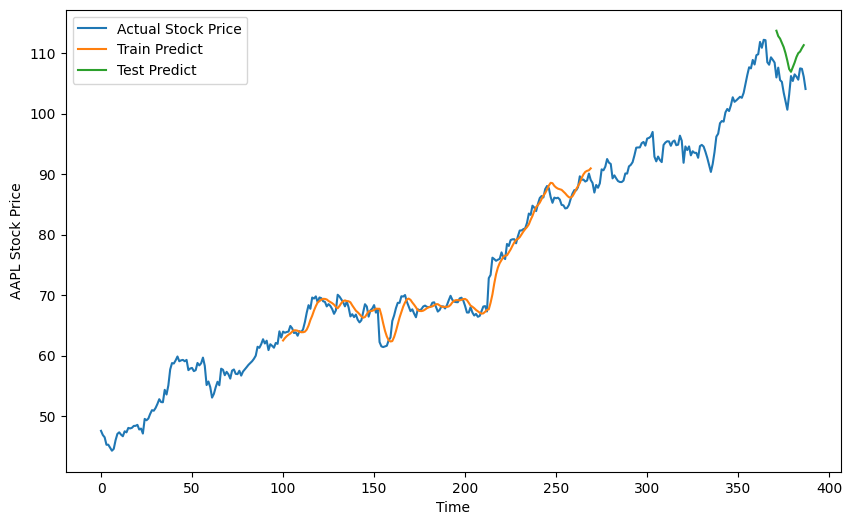

In [66]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1, :] = test_predict

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Price')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.xlabel("Time")
plt.ylabel(f"{stock_symbol} Stock Price")
plt.legend()
plt.show()